In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('data/news_cleaned.csv')

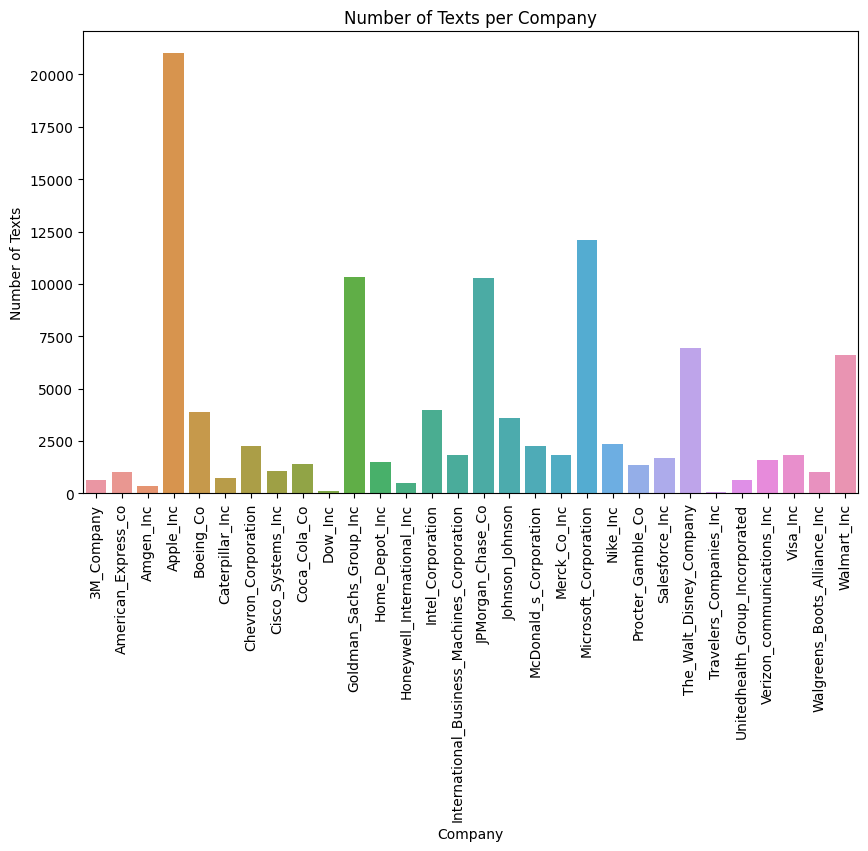

In [19]:
# Group by 'company' and count 'text'
grouped_df = df.groupby('company')['text'].count().reset_index()

# Rename the 'text' column to 'count'
grouped_df.rename(columns={'text': 'count'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='count', data=grouped_df)
plt.title('Number of Texts per Company')
plt.xlabel('Company')
plt.ylabel('Number of Texts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

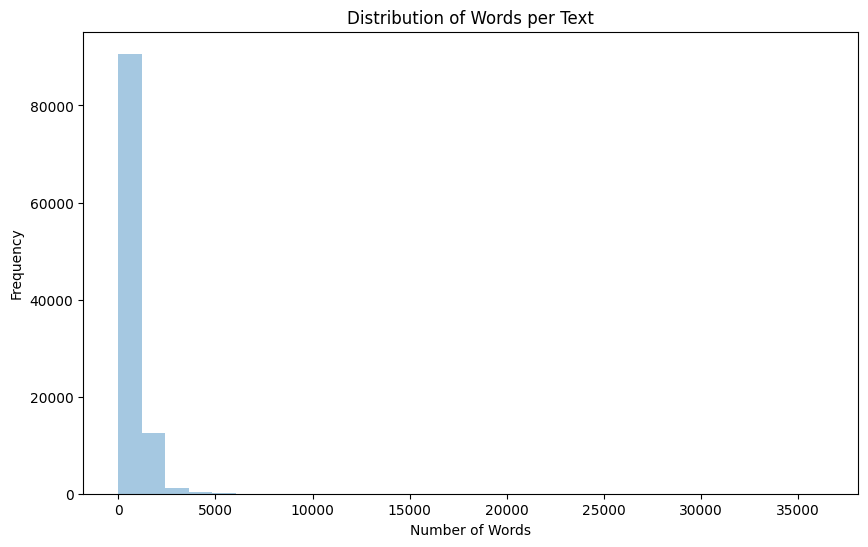

In [20]:
# Create a new column 'word_count' which is the count of words in each 'text'
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(df['word_count'], kde=False, bins=30)
plt.title('Distribution of Words per Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

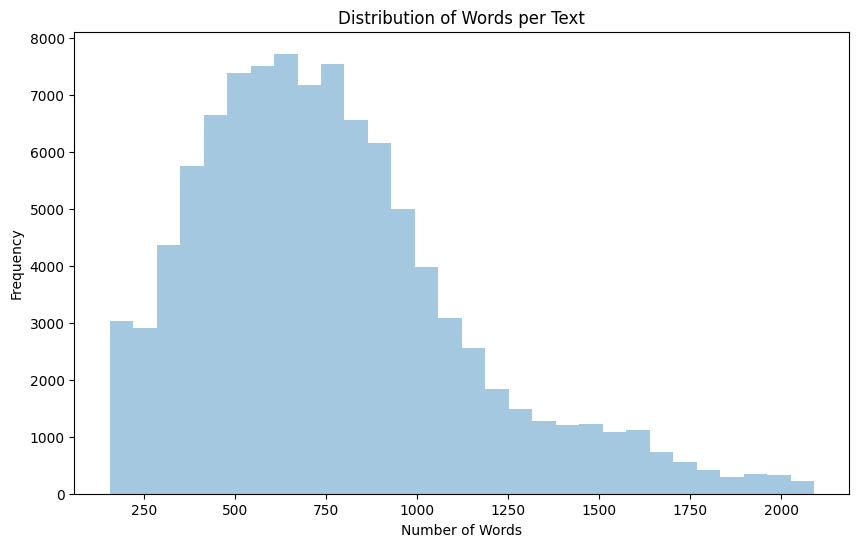

In [21]:
# Create a new column 'word_count' which is the count of words in each 'text'
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Calculate the 2.5% and 97.5% percentiles
lower_bound, upper_bound = np.percentile(df['word_count'], [2.5, 97.5])
#Take the 2.5% and 97.5% percentiles of the 'word_count' column
df_nine_five = df[(df['word_count'] > lower_bound) & (df['word_count'] < upper_bound)]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(df_nine_five['word_count'], kde=False, bins=30)
plt.title('Distribution of Words per Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()

In [22]:
#Import stocks performance data from yahoo finance
import yfinance as yf

stocks = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'INTC', 'IBM', 'JPM', 'JNJ', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'DIS', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT']
data = yf.download(stocks, start="2020-01-01", end="2022-12-31")

[*********************100%%**********************]  30 of 30 completed


In [23]:
#Create a new dataframe with only the closing prices
df_close = data['Close']
df_close = df_close.reset_index()
df_close = df_close.rename(columns={'index':'Date'})

<Axes: xlabel='Date', ylabel='AAPL'>

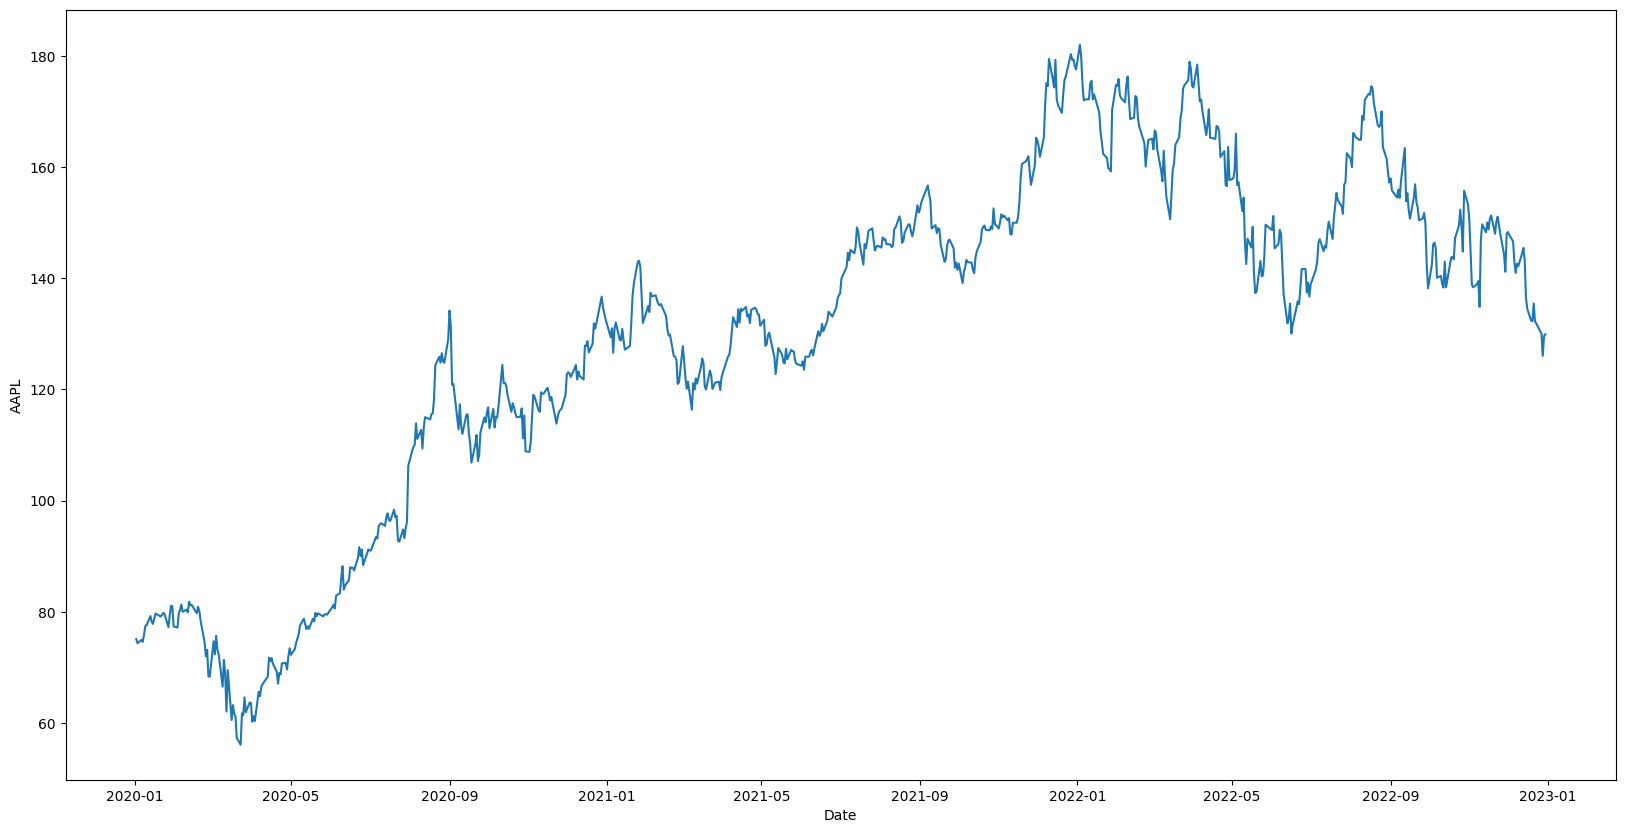

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(x="Date", y="AAPL", data=df_close)